<a href="https://colab.research.google.com/github/mbalbi/ciencia_de_datos/blob/main/tps/actuales/ICDIC_TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico 2: Inferencia Estadística
**Objetivos:** Con este trabajo práctico se busca que los alumnos comiencen a familiarizarse con las herramientas de inferencia estadística para la obtención de los parámetros de un modelo (en este caso, funciones de distribución de probabilidad) en base a datos. A tal fin, primero se revisarán conceptos de simulación de variables aleatorias y el uso del teorema de Bayes.

**Librerías:** En este trabajo se utilizará

*   Numpy: matemática básica y definición de matrices y vectores; simulación de variables aleatorias
*   Seaborn: construcción de gráficos
*   Bambi: Librería basada en PyMC para la inferencia estadística utilizando cadenas de Markov

También necesitaremos de la librería ArviZ para ver los resultados de nuestra inferencia, al igual que Numpy.






In [ ]:
# Instalación e import de Bambi
try:
  import bambi as bmb
except:
  !pip install bambi
  import bambi as bmb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import pandas as pd
import io

In [ ]:
def qqplot(x,y):
# FUNCION PARA GRAFICAR QQ-PLOTS
# x es el vector con los datos obtenidos mediante simulacion
# y es el vector con los datos muestras
# La funcion asume que el vector x tiene más elementos que el vector y

  from scipy.interpolate import interp1d
  from statsmodels.distributions.empirical_distribution import ECDF
  # Funciones acumuladas empíricas
  CDFx = ECDF(x)
  CDFy = ECDF(y)

  # Factores de Correccion
  Nx = len(CDFx.x)-1
  CDFx.y = CDFx.y*Nx/(Nx+1)
  Ny = len(CDFy.x)-1
  CDFy.y = CDFy.y*Ny/(Ny+1)

  # Interpolación lineal para CDFx
  CDFx_interp = interp1d(CDFx.y[1:],CDFx.x[1:])

  # Cuantiles de Y
  Qy = CDFy.x[1:]
  # Encontrar los cuantiles de de x asociados a los de y
  Qx = CDFx_interp(CDFy.y[1:])

  # Datos para el grafico
  xmin = np.min([np.min(Qx),np.min(Qy)])
  xmax = np.max([np.max(Qx),np.max(Qy)])

  # Plot
  fig = plt.figure(figsize=(5,5))
  plt.scatter(Qx,Qy)
  plt.plot([xmin,xmax],[xmin,xmax],'k-')
  plt.grid()
  plt.xlabel('Cuantiles Simulación')
  plt.ylabel('Cuantiles Muestras')
  plt.show()

Grupo:

Integrantes:

*   Apellido, Nombres XXXXXX
*   Apellido, Nombres XXXXXX
*   Apellido, Nombres XXXXXX
*   Apellido, Nombres XXXXXX
*   Apellido, Nombres XXXXXX

## Ejercicio 1: Diversión con Variables Aleatorias

### Actividad 1

**Actividad**: Haga 10000 simulaciones de una variable aleatoria $X\sim N\left(\mu=2,\sigma=1\right)$ y calcule la media y el desvío estándar de las simulaciones para chequear el resultado. Guarde los resultados de la simulación en una variable `X`, y la media y desvio en las variables `mu_x` y `std_x`.

Media:  1.9815662798417344
Desvio:  0.9876059497081753


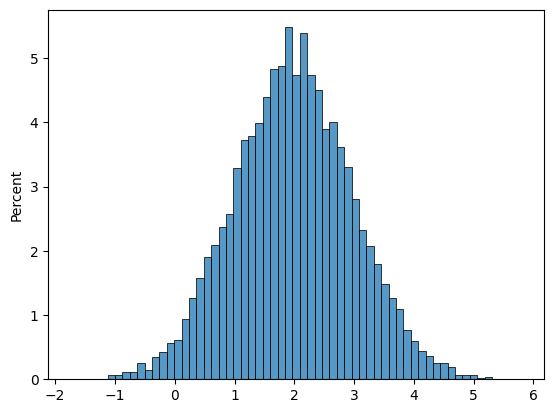

In [ ]:
n = 10000
np.random.seed(0)

################################################################################
# CODIGO DEL ALUMNO
X =
mu_x =
std_x =
################################################################################

print('Media: ',mu_x)
print('Desvio: ', std_x)

sns.histplot(X,stat="percent")
plt.show()

### Actividad 2

**Actividad**: Haga 1000 simulaciones de una variable aleatoria $\log{Y}\sim N\left(\mu=1,\sigma=0.4\right)$ (recuerde que esto significa que $Y$ sigue una distribución lognormal). Estime la media de $Y$

Media:  2.955270328290954


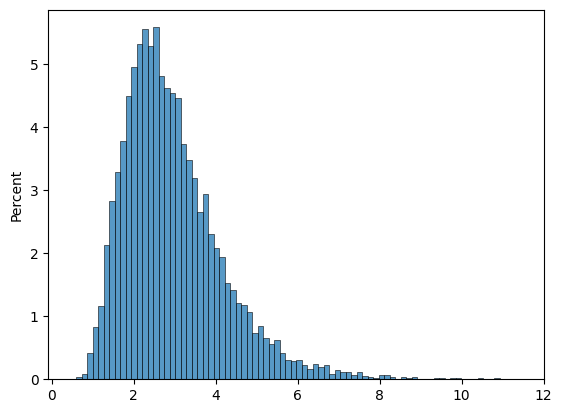

In [ ]:
################################################################################
# CODIGO DEL ALUMNO
Y =
mu_y =
################################################################################

print('Media: ',mu_y)

sns.histplot(Y,stat="percent")
plt.show()

### Actividad 3

**Actividad**: ¿Cuál es la relación entre la media de $Y$ y los parámetros que debió incluir para simular la variable?

**Su respuesta**:

### Actividad 4

**Actividad**: Considerando $Z = X+Y$ calcule:


*   $P(Z>4)$ en `PZ4`
*   $P(Z>4|Y<2)$ en `PZ4Y2`
*   El valor medio de Z en `mu_z`

Pregunta 1
0.7163
Pregunta 2
0.35086895255988726
Pregunta 3
4.936836608132688


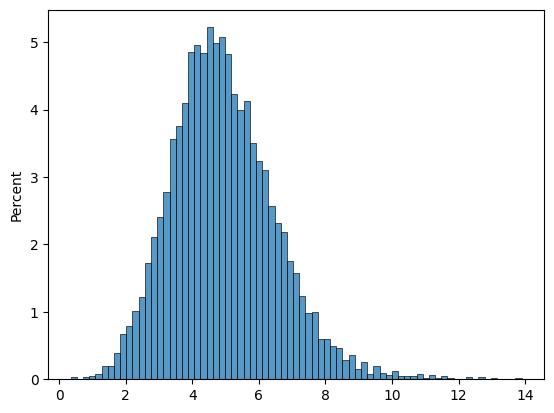

In [ ]:
################################################################################
# CODIGO DEL ALUMNO
Z =

PZ4 =


PZ4Y2 =

mu_z =
################################################################################

print('Pregunta 1')
print(PZ4)
print('Pregunta 2')
print(PZ4Y2)
print('Pregunta 3')
print(mu_z)

sns.histplot(Z,stat="percent")
plt.show()

### Actividad 5

**Actividad**: ¿La variable $Z$ sigue alguna distribución en particular?

**Su respuesta**:

### Actividad 6

**Actividad**: Construya la función de probabilidad acumulada de $Z$ `ECDF_Z` y calcule $Z25$ tal que $P(Z<Z25)=0.25$ en `Z25`

NOTA: Puede ser útil construir un vector ordenado de las simulaciones de `Z` de nombre `Z_ord`.

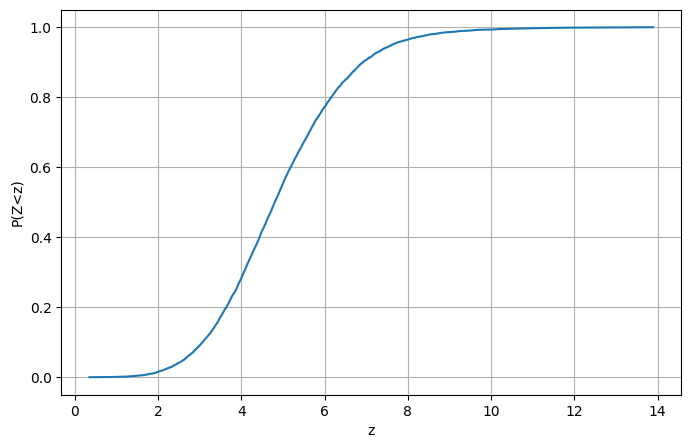

El cuantil 0.25 de Z es: 3.8704106858106115


In [ ]:
################################################################################
Z_ord =
ECDF_Z =

Z25 =
################################################################################

fig = plt.figure(figsize=(8,5))
plt.plot(Z_ord,ECDF_Z)
plt.grid()
plt.xlabel('z')
plt.ylabel('P(Z<z)')
plt.show()

print('El cuantil 0.25 de Z es:',Z25)

## Ejercicio 2: Teorema de Bayes

En un pueblo pequeño cercano a Mendoza, un terremoto de magnitud $M=6$ sacudió las edificaciones provocando un colapso. La primera pregunta que cualquier ingeniero se hace ante esta situación es ¿por qué?

Bueno, por un lado, sabemos que los edificios se diseñan aceptando cierta probabilidad de colapso. En este caso, podemos considerar que la probabilidad de colapso ($C=1$) de un edificio diseñado con el reglamento actual aprobado por el municipio es 5% ($R=1$) para un sismo de esta magnitud.

Mientras tanto, edificaciones viejas de mamposteria ($R=0$) son mucho más vulnerables. De un análisis no-lineal de este tipo de estructuras, se ha visto que la probabilidad de colapso ($C=1$) ante sismos de esta magnitud es de 20%.

$$P(C=1|R=0)=0.20$$

Por otro lado, el pueblo útlimamente ha sido centro de un enorme crecimiento por el aumento de trabajo en la región, por lo que la mayoría de las casas han sido construidas con posterioridad de la aprobación del reglamento. En particular, de 2000 casas en el pueblo, tan solo 100 son de mampostería tradicional ($R=0$).

En la radio del pueblo llaman a 3 personas discutir acerca del colapso y sus implicancias.

- **Carlos**: El hijo de 17 años de un abogado constiuticionalista que vive en la zona y está arrancando su carrera periodística.
- **Juana**: Una ingeniera estructural oriunda del pueblo que estudió en la Universidad Nacional de Cuyo.
- **Alexandra**: Una ingeniera estructural norteamericana que estudió en Cornell.

Cada uno de ellos tiene distinta información (algunos conocen el inventario de edificios del pueblo, otros tienen conocimiento respecto al comportamiento de la estructuras, etc.) pero tienen que responder la misma consulta: ¿Qué cree que pudo haber pasado con la estructura colapsada?

O, dicho de otra manera, ¿la estructura que colapsó es de mampostería o moderna según su intuición?

**NOTA**: Carlos, al no ser ingeniero, asigna igual probabilidad de colapso a cada tipo de estructura (solo mira qué tipo de estructura es más probable). Alexandra, al no conocer el pueblo, asigna igual probabilidad de que una estructura sea nueva o vieja (solo mira qué tipo de estructura tiene más chances de colapsar en el vacío). Juana usa toda la información disponible

### Actividad 1

**Actividad**: Para cada una de las 3 personas, escriba su opinión en forma automática respecto a qué edificio a colapsado (con un `if` por ejemplo):

- "Carlos opina que la estructura colapsada es de mampostería" o
- "Carlos opina que la estructura colapsada es reciente"

E incluya el cálculo de probabilidad realizado. Este es su primer modelo de predicción de su cursada!

*NOTA*: La decisión pueden hacerla comparando probabilidades en términos absolutos o relativos.

*NOTA 2*: Recuerden el teorema de Bayes cuando sea aplicable.

In [ ]:
# CODIGO DEL ALUMNO ============================================================

# ==============================================================================

Carlos opina que la estructura colapsada es reciente, P = 0.05
Juana opina que la estructura colapsada es reciente, P = 0.1739130434782609
Alexandra opina que la estructura colapsada es de mampostería, P = 0.8


### Actividad 2

Durante la mesa de debate el conductor comenta que entre los escombros se encontraron restos de asbesto ($A=1$) y que según el último censo 3 de cada 4 edificaciones tradicionales fueron construidas con asbesto ($R=0$), mientras que solo 1 de cada 10 estructuras construidas desde la adopción reglamentaria ($R=1$) presentaban este material.

¿Cómo actualiza esto las probabildades de que la estructura colapsada sea una efdicación antigua para cada panelista?

**Actividad**: Actualice el ejercicio anterior con la nueva información provista, aplicando el teorema de Bayes.

In [ ]:
# CODIGO DEL ALUMNO ============================================================

# ==============================================================================

Carlos opina que la estructura colapsada es reciente, P = 0.28301886792452835
Juana opina que la estructura colapsada es de mampostería, P = 0.6122448979591837
Alexandra opina que la estructura colapsada es de mampostería, P = 0.967741935483871


### Actividad 3

**Actividad**: Repita el ejercicio para Juana pero considerando la probabilidad de que el edificio sea antiguo considerando la la presencia de asbesto primero, y luego aplicando bayes para considerar el colapso (es decir, invirtiendo el orden de llegada de la información)

¿Por qué termina dando lo mismo?

In [ ]:
# CODIGO DEL ALUMNO ============================================================

# ==============================================================================

Juana opina que la estructura colapsada es de mampostería, P = 0.6122448979591838


**Su respuesta**:

## Ejercicio 3: Evaluación de un tratamiento para el hormigón (Analítico)

Una empresa constructora quiere evaluar un nuevo proceso de curado y ver si tiene un efecto en la resistencia del hormigón. Para ello se tienen 7 pares de ensayos de probetas, unos con y otros sin tratamiento. Se considerará un efecto significativo si la resistencia del hormigón aumenta por encima de los $2MPa$ por sobre el hormigón sin tratamiento con una probabilidad mayor al 90%.

El objetivo de este ejercicio es afirmar si esto es cierto a partir de un enfoque probabilístico.

In [ ]:
#Abrimos un archivo local, es decir, que ha sido descargado en su computadora
from google.colab import files
uploaded = files.upload()

Saving hormigones_tratamiento_tp2.csv to hormigones_tratamiento_tp2.csv


In [ ]:
#Se crea un DataFrame
df = pd.read_csv(io.BytesIO(uploaded['hormigones_tratamiento_tp2.csv']))
df

,Resistencia,Tratamiento
0,30.9,No
1,33.3,No
2,33.5,No
3,36.2,No
4,37.2,No
5,37.6,No
6,38.2,No
7,34.2,Si
8,37.1,Si
9,39.6,Si


### Actividad 1

**Actividad**: Calcule el valor medio y el desvío estandar (muestral) de los hormigones con y sin tratamiento. Indique la cantidad de muestras de cada uno.

In [ ]:
# Cantidad de muestras
N = len(df)
print('Numero de muestras totales',N)

# Hormigón sin tratar
# CODIGO DEL ALUMNO ============================================================
h0_mean =
h0_std =
N0 =
# ==============================================================================

# Hormigón con tratamiento
# CODIGO DEL ALUMNO ============================================================
h1_mean =
h1_std =
N1 =
# ==============================================================================

print('Sin Tratamiento:',N0,'muestras')
print('Media',h0_mean,'desvio',h0_std)
print('Con Tratamiento:',N1,'muestras')
print('Media',h1_mean,'desvio',h1_std)

Numero de muestras totales 14
Sin Tratamiento: 7 muestras
Media 35.271428571428565 desvio 2.7299049346783053
Con Tratamiento: 7 muestras
Media 39.699999999999996 desvio 3.234192325759245


Debiera ver una diferencia de más de $4MPa$ en el valor medio.

### Inclusión de la incertidumbre en la comparación

#### Actividad 2

**Actividad**: Asumiendo una distribución a priori no-informativa, un modelo de generación de datos Normal y estudiando cada hormigón por separado:

1. ¿Qué distribución sigue el valor medio de cada hormigón?

**Su respuesta**:

#### Actividad 3

**Actividad**: Mediante simulación, compare los valores medios y obtenga el intervalo de confianza de 90% para la diferencia entre valores medios

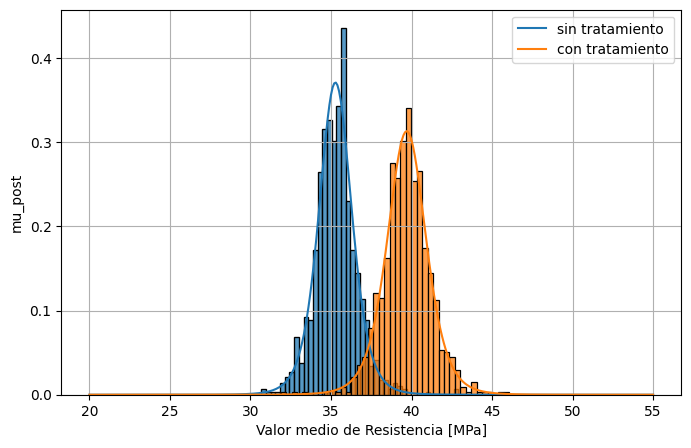

In [ ]:
n = 1000
np.random.seed(100)

# CODIGO DEL ALUMNO ============================================================
m0_pred =
m1_pred =
# ==============================================================================

x = np.linspace(20,55,351)
import scipy.stats as st
m0_fun = st.t( N0-1, loc=h0_mean, scale=h0_std * np.sqrt(1/N0) )
m1_fun = st.t( N1-1, loc=h1_mean, scale=h1_std * np.sqrt(1/N1) )

fig = plt.figure(figsize=(8,5))
sns.histplot(m0_pred, stat='density')
sns.histplot(m1_pred, stat='density')
plt.plot(x,m0_fun.pdf(x),label='sin tratamiento')
plt.plot(x,m1_fun.pdf(x),label='con tratamiento')

plt.grid()
plt.xlabel('Valor medio de Resistencia [MPa]')
plt.ylabel('mu_post')
plt.legend()
plt.show()

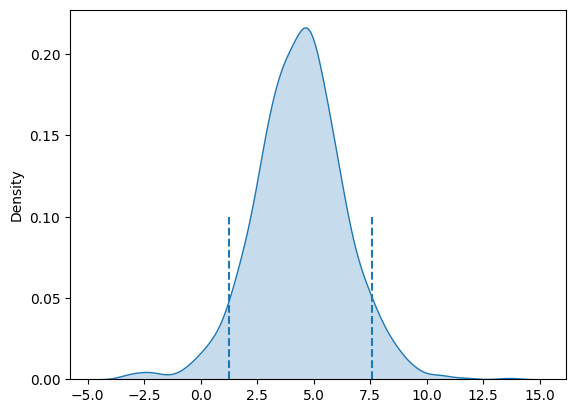

El intervalo de confianza 90% de la diferencia entre valores medios es [1.26427639 7.55836006]


In [ ]:
# Generar simulaciones de la diferencia

# CODIGO DEL ALUMNO ============================================================
mudiff =
# ==============================================================================

# Intervalos de Confianza

# CODIGO DEL ALUMNO ============================================================
d05 =
d95 =
# ==============================================================================

fig, ax = plt.subplots()
sns.kdeplot( mudiff, fill=True )
ax.vlines( x=d05, ymin=0, ymax=0.1, linestyle='--' )
ax.vlines( x=d95, ymin=0, ymax=0.1, linestyle='--' )
plt.show()

print('El intervalo de confianza 90% de la diferencia entre valores medios es',np.array([d05,d95]))

#### Actividad 4

**Actividad**: Puede afirmar que la diferencia en el valor medio es mayor a $2MPa$? ¿Y que son diferentes?

**Su respuesta**

### Función predictiva para cada hormigón

#### Actividad 5

**Actividad**: Asumiendo una distribución a priori no-informativa, un modelo de generación de datos Normal y estudiando cada hormigón por separado:

1. ¿que distribución siguen las predicciones sobre la resistencia de cada hormigón?
2. ¿Difiere del modelo del cual se originaron los datos? ¿Por qué sí/no?

**Su respuesta**:

#### Actividad 6

**Actividad**: Simule 1000 muestras de los hormigones con y sin tratamiento en las variables `h0_pred` y `h1_pred`. Si todo está bien, el resultado debiera coincidir con la función análitica presentada en el gráfico.

NOTA: Indique claramente los parámetros de la función de distribución, y lea detenidamente la documentación de Numpy para incoporarlos correctamente en la simulación.

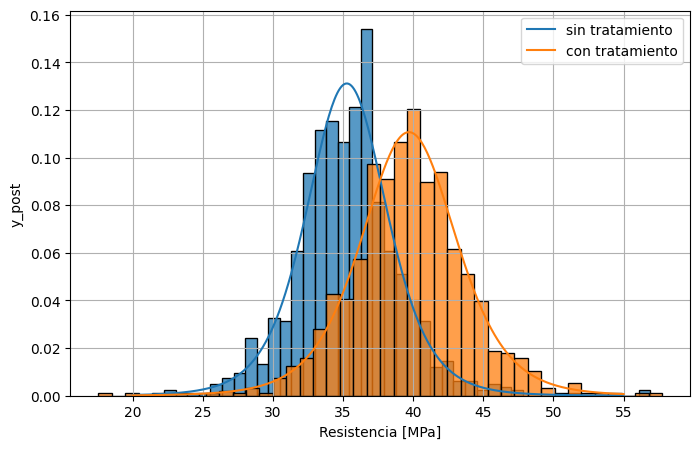

In [ ]:
# Predictiva de las resistencias
n = 1000
np.random.seed(100)

# CODIGO DEL ALUMNO ============================================================
h0_pred =
h1_pred =
# ==============================================================================

x = np.linspace(20,55,351)
import scipy.stats as st
h0_fun = st.t( N0-1, loc=h0_mean, scale=h0_std * np.sqrt(1+1/N0) )
h1_fun = st.t( N1-1, loc=h1_mean, scale=h1_std * np.sqrt(1+1/N1) )

fig = plt.figure(figsize=(8,5))
sns.histplot(h0_pred, stat='density')
sns.histplot(h1_pred, stat='density')
plt.plot(x,h0_fun.pdf(x),label='sin tratamiento')
plt.plot(x,h1_fun.pdf(x),label='con tratamiento')

plt.grid()
plt.xlabel('Resistencia [MPa]')
plt.ylabel('y_post')
plt.legend()
plt.show()

###Comparación de Resistencias características

Anteriormente comparamos valores medios. Ahora comparemos resistencias características:

#### Actividad 7

**Actividad**: Calcule la resistencia característica (valor con 95% de probabilidad de excedencia) de los hormigones. Si su cuenta empírica está bien, debiera parecerse a la solución analítica presentada abajo.

In [ ]:
fc0 = []
fc1 = []

# CODIGO DEL ALUMNO ============================================================

fc0 =


fc1 =
# ==============================================================================

fc0_an = h0_fun.ppf(0.05)
fc1_an = h1_fun.ppf(0.05)
print('Sin tratamiento:', fc0,'MPa (analítico:',fc0_an,'MPa)')
print('Con tratamiento:', fc1,'MPa (analítico:',fc1_an,'MPa)')

Sin tratamiento: 29.40472654351451 MPa (analítico: 29.60046847212611 MPa)
Con tratamiento: 33.09603750805813 MPa (analítico: 32.98145995127401 MPa)


La diferencia es también de prácticamente $4MPa$.

### Diferencia entre hormigones


Veamos ahora la variable aleatoria "Diferencia entre hormigones". Creáse o no, la resta de las funciones de distribución predictivas de este ejercicio **no** tiene solución analítica. ¡Ya no queda otra que usar las simulaciones que generaron para contestar esto!

#### Actividad 8

**Actividad**: guarde las simulaciones de la diferencia entre hormigones en `rdiff`, calcule la probabilidad de que la diferencia sea mayor o igual a 2 e indique si cumple con el criterio propuesto de significidad (probabilidad mayor a 90%). Calcule también los intervalos de confianza.

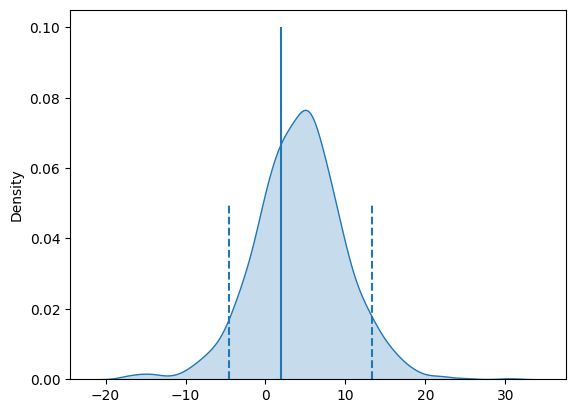

La probabilidad de que el hormigón con tratamiento sea 2MPa más resistente es 0.676
El intervalo de confianza 90% de la diferencia entre resistencias es [-4.52140648 13.2809505 ]


In [ ]:
# Generar simulaciones de la diferencia

# CODIGO DEL ALUMNO ============================================================
rdiff =
# ==============================================================================

# Probabilidad de que h2 - h1 > 2

# CODIGO DEL ALUMNO ============================================================
Pefecto =
d05 =
d95 =
# ==============================================================================

fig, ax = plt.subplots()
sns.kdeplot( rdiff, fill=True )
ax.vlines( x=2, ymin=0, ymax=0.1, linestyle='-' )
ax.vlines( x=d05, ymin=0, ymax=0.05, linestyle='--' )
ax.vlines( x=d95, ymin=0, ymax=0.05, linestyle='--' )
plt.show()

print('La probabilidad de que el hormigón con tratamiento sea 2MPa más resistente es',Pefecto)
print('El intervalo de confianza 90% de la diferencia entre resistencias es',np.array([d05,d95]))

**Su respuesta**:

### Conclusiones

A lo largo del ejercicio vimos 4 formas de "comparar" hormigones:

1. Comparando el valor medio de las muestras
2. Comparando la estimación del valor medio considerando incertidumbres
3. Comparando las resistencias características en base a los datos
4. Comparando la diferencia entre muestras de hormigón en base a los datos

Cada una de ellas tiene su aplicación. Ahora:

#### Actividad 9

**Actividad**: ¿Cúal de todas las variantes antes mencionada usaría para

- Contestar si los datos de uno y otro hormigón tienen modelos de generación de datos distintos entre sí?
- Contestar si el valor de resistencia a utilizar para diseñar es distinto con o sin tratamiento?
- Contestar la pregunta orginal del fabricante (*Que la resistencia de un hormigón con tratamiento es superior a $2MPa$ con un 90% de probabilidad a uno sin tratamiento*)?

Justifique sus respuestas.

**Su respuesta**:

#### Actividad 10

**Actividad**: Si en vez de ser hormigón estuviesemos hablando de espesores de 2 chapas de acero, con un modelo de generación de datos donde $\sigma$ representa errores de medición en vez de dispersión de resultados (cada chapa fue medida por muchas personas distintas), cuál de todos los cálculos anteriores sería el más adecuado para contestar si una chapa tiene efectivamente un espesor distinto a la otra?

**Su respuesta**:

## Ejercicio 4: Período de retorno de lluvias en CABA

En este último ejercicio queremos obtener el período de retorno de precipitaciones mensuales en CABA. Es decir, "cada cuánto años en promedio llueve $x\ mm$" en un mes en la ciudad.

Para ello tenemos un dataset de $mm$ de la lluvia mensual de los últimos 30 años de la ciudad (1991-2020).

### Curado del dataset (Lo han visto en TP0 y TP1)

Primero, importamos el archivo `historico_precipitaciones-CABA.csv` en Google Colab.

In [ ]:
# Abrimos un archivo local, es decir, que ha sido descargado en su computadora
from google.colab import files
uploaded = files.upload()

Saving historico_precipitaciones-CABA.csv to historico_precipitaciones-CABA.csv


In [ ]:
# Se crea un DataFrame
df = pd.read_csv(io.BytesIO(uploaded['historico_precipitaciones-CABA.csv']))
df.head()

,ano,mes,mm,dias
0,1991,Enero,190.0,7
1,1991,Febrero,30.5,6
2,1991,Marzo,55.0,8
3,1991,Abril,125.6,12
4,1991,Mayo,68.4,7


In [ ]:
# Crear columna con datetime
lista_meses = df['mes'].unique()
mes_num = df.apply (lambda row: np.where(row['mes']==lista_meses)[0][0]+1, axis=1)
df['fecha'] = pd.to_datetime(df['ano'].astype(str) + mes_num.astype(str), format='%Y%m')
df = df.set_index('fecha')
df.iloc[:12]

,ano,mes,mm,dias
fecha,,,,
1991-01-01,1991,Enero,190.0,7
1991-02-01,1991,Febrero,30.5,6
1991-03-01,1991,Marzo,55.0,8
1991-04-01,1991,Abril,125.6,12
1991-05-01,1991,Mayo,68.4,7
1991-06-01,1991,Junio,119.7,10
1991-07-01,1991,Julio,89.3,8
1991-08-01,1991,Agosto,66.4,7
1991-09-01,1991,Septiembre,85.5,10


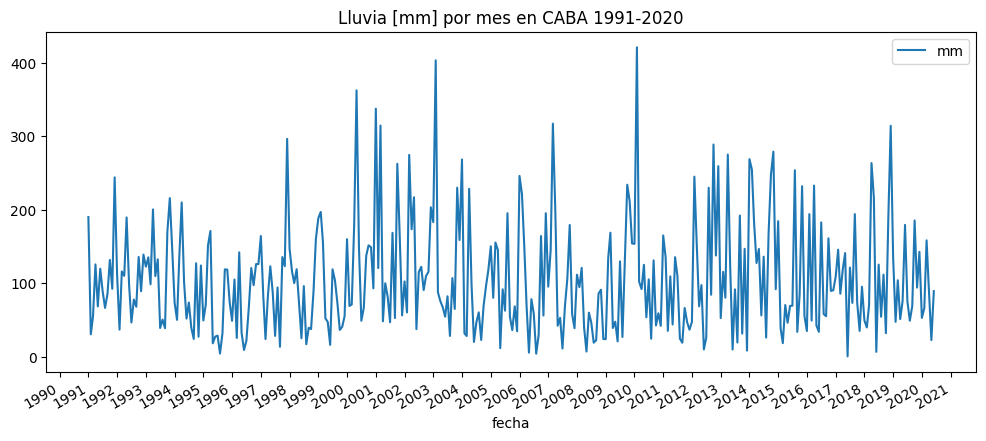

In [ ]:
import matplotlib.dates as mdates
# Grafico
ax = df.plot( y='mm', figsize=(12,5), x_compat=True )
ax.xaxis.set_major_locator(mdates.YearLocator()) # Poner labels solo en cada año
ax.xaxis.set_major_formatter( mdates.DateFormatter("%Y") ) # Formatear label
plt.title('Lluvia [mm] por mes en CABA 1991-2020');

In [ ]:
# Datafarme de maximos anuales
yearly_max = df.loc[df.groupby("ano")["mm"].idxmax()]#df.resample("Y").max()
yearly_max.head()

,ano,mes,mm,dias
fecha,,,,
1991-12-01,1991,Diciembre,244.0,16
1992-05-01,1992,Mayo,189.5,9
1993-11-01,1993,Noviembre,215.8,14
1994-04-01,1994,Abril,209.9,11
1995-04-01,1995,Abril,171.1,11


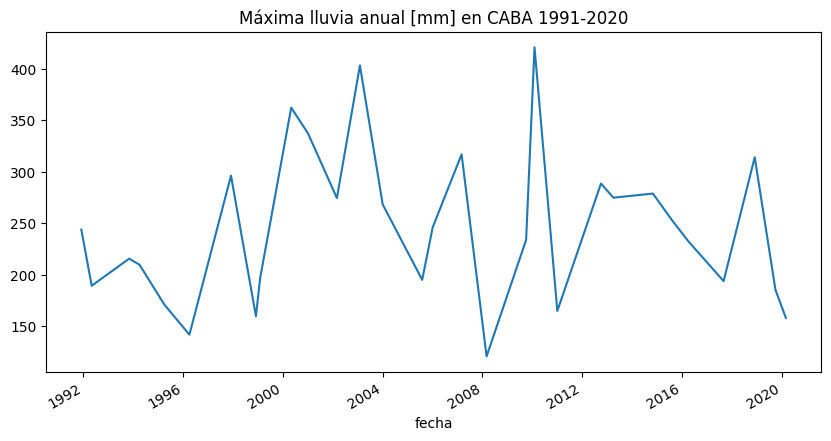

In [ ]:
# Grafico
ax = yearly_max.plot( y='mm', legend=False, figsize=(10,5), x_compat=True )
ax.xaxis.set_major_formatter( mdates.DateFormatter("%Y") ) # Formatear label # Formatear labels
plt.title('Máxima lluvia anual [mm] en CABA 1991-2020');

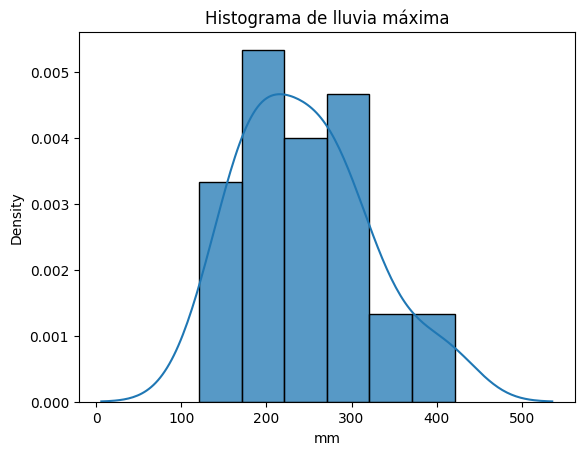

Valor promedio: 245.07 mm
Desvio 75.54 mm


In [ ]:
# Histograma
sns.histplot(data = yearly_max, x='mm', bins='sturges', stat='density').set(title='Histograma de lluvia máxima')
sns.kdeplot(data = yearly_max, x='mm')
plt.show()

print('Valor promedio:',yearly_max['mm'].mean(),'mm')
print('Desvio',np.round(yearly_max['mm'].std(),2),'mm')

###Ajuste de una función de distribución para la máxima lluvia acumulada mensual por año

En este paso ajustarán una función de distribución para la máxima lluvia mensual en un año.

#### Modelo de datos: Normal

En primer lugar, vamos a asumir (tenga sentido o no, ustedes podrán decidirlo en función del histograma) que los datos vienen de una distribución normal.

##### Actividad 1

**Actividad**: Construya un modelo de inferencia asumiendo datos normales. Muestre la distribuciones a priori elegidas, la evaluación de la convergencia y la distribuciones a posteriori, como se hizo en el ejercicio anterior.

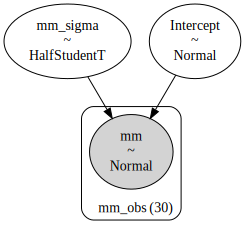

In [ ]:
# CODIGO DEL ALUMNO ============================================================
# Model
model1 =
# ==============================================================================

# Ver el modelo
model1.build()
model1.graph()

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


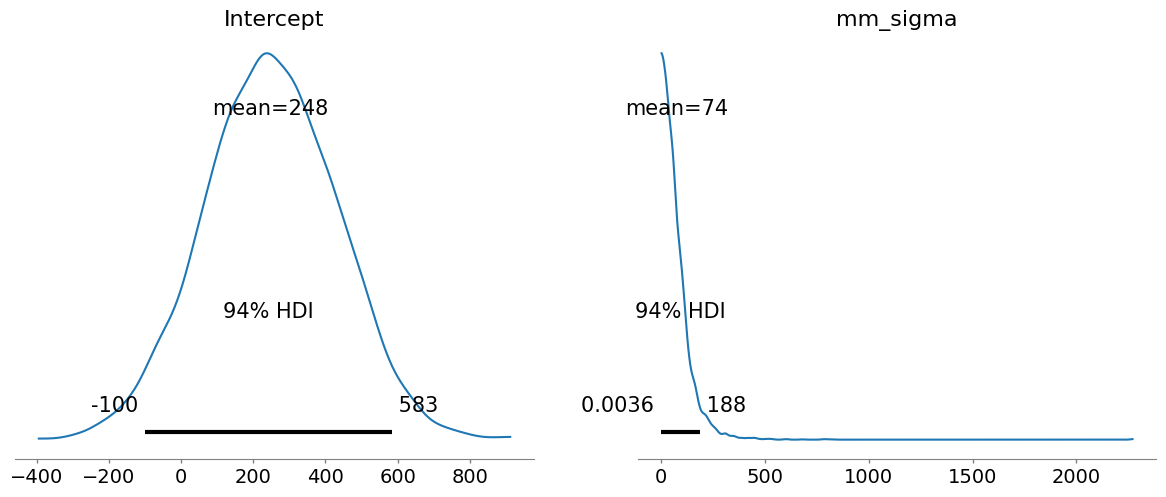

In [ ]:
# Mostrar Distribuciones a Priori Elegidas
# CODIGO DEL ALUMNO ============================================================

# ==============================================================================

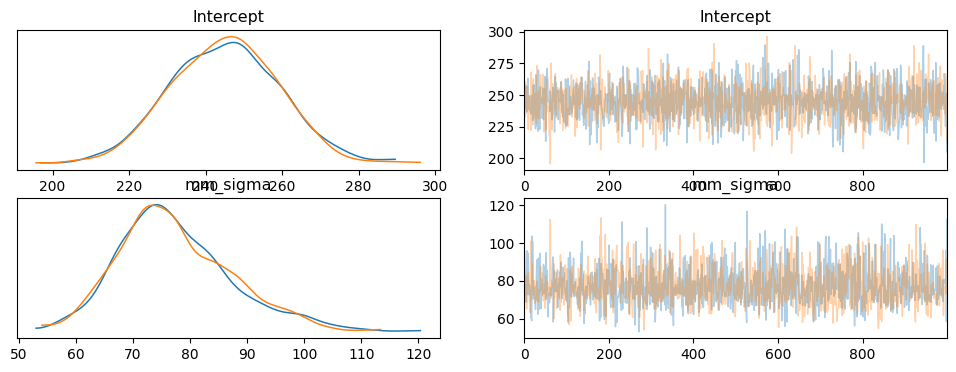

In [ ]:
# Hacer inferencia
# CODIGO DEL ALUMNO ============================================================
results1 =
# ==============================================================================

# MCMC diagnostic
az.plot_trace(results1, compact=False);
plt.show()

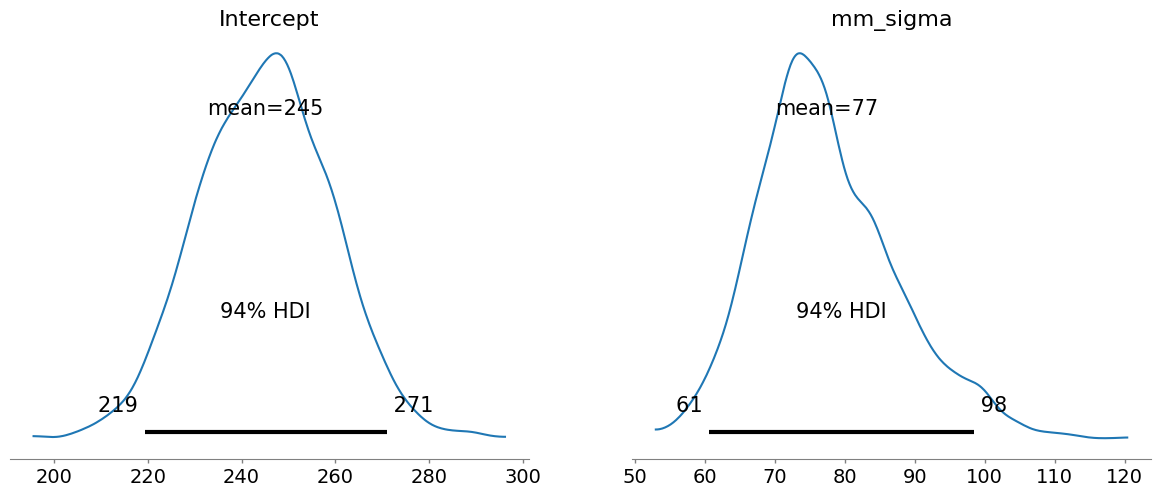

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,245.034,14.152,219.401,270.901,0.311,0.221,2068.0,1571.0,1.0
mm_sigma,77.453,10.021,60.658,98.422,0.246,0.175,1694.0,1208.0,1.0


In [ ]:
# Distribuciones a posteriori
# CODIGO DEL ALUMNO ============================================================

# ==============================================================================

##### Actividad 2

**Actividad**: Realice simulaciones del modelo, graficando la distribución posterior predictiva con ArviZ. Tomando los datos de `posterior_predictive`, construya manualmente un histograma de todas las simulaciones.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


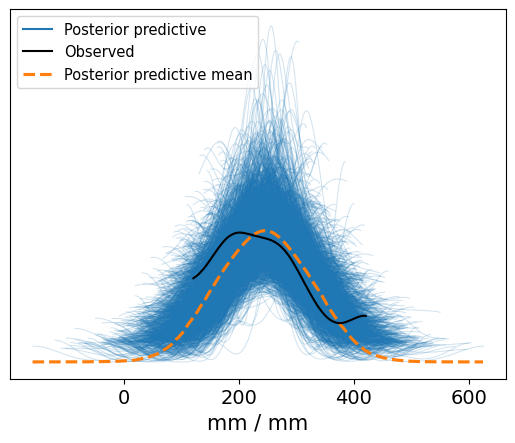

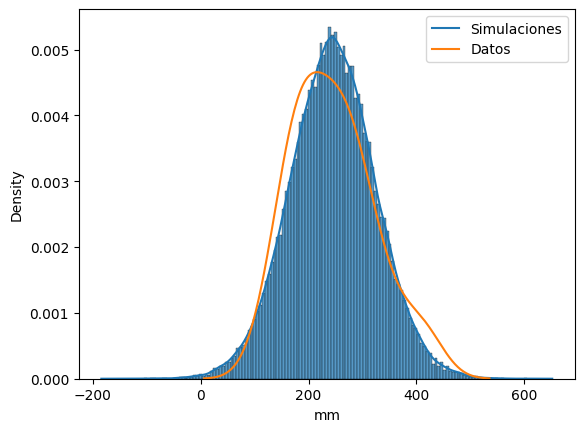

In [ ]:
# Simulaciones predictivas
# CODIGO DEL ALUMNO ============================================================

# ==============================================================================

# Posterior predictiva
# CODIGO DEL ALUMNO ============================================================

# ==============================================================================
plt.show()

# Histograma
# CODIGO DEL ALUMNO ============================================================

# ==============================================================================
sns.kdeplot(data = yearly_max, x='mm',label='Datos')
plt.legend()
plt.show()

No parecen parecerse mucho, ¿no? Probemos otro modelo.

#### Modelo de datos: Logormal

##### Actividad 3

**Actividad**: Repita lo anterior para un modelo Lognormal (recuerde que el logaritmo natural de una variable con distribución lognormal tiene distribución normal).

NOTA: Construir el modelo de esta manera hace que las simulaciones esten hechas para el logaritmo de las precipitaciones. Aplique la transformación necesaria para que el histograma esté en la escala correcta.

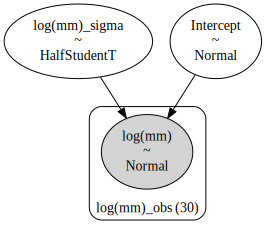

In [ ]:
# CODIGO DEL ALUMNO ============================================================
model2 =
# ==============================================================================

# Ver el modelo
model2.build()
model2.graph()

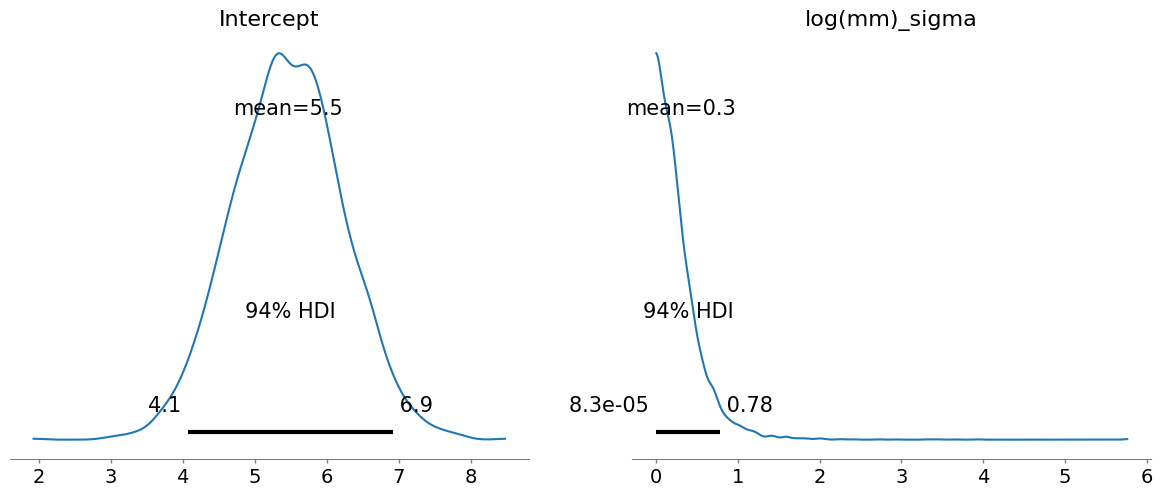

In [ ]:
# Mostrar Distribuciones a Priori
# CODIGO DEL ALUMNO ============================================================

# ==============================================================================

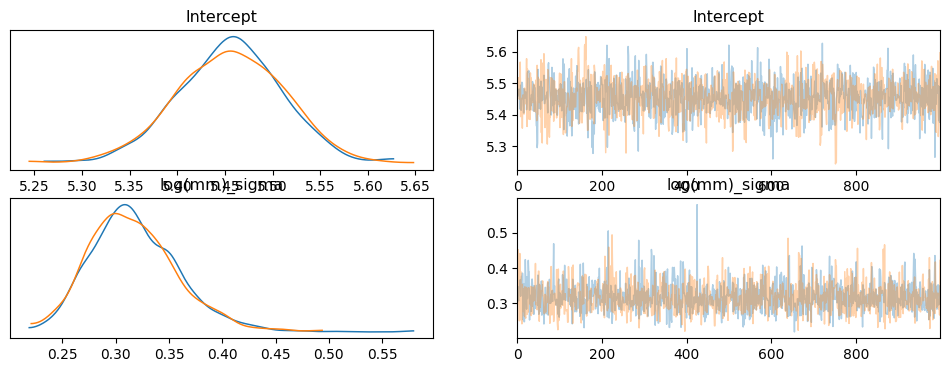

In [ ]:
# Hacer inferencia
# CODIGO DEL ALUMNO ============================================================
results2 =
# ==============================================================================

# MCMC diagnostic
az.plot_trace(results2, compact=False);
plt.show()

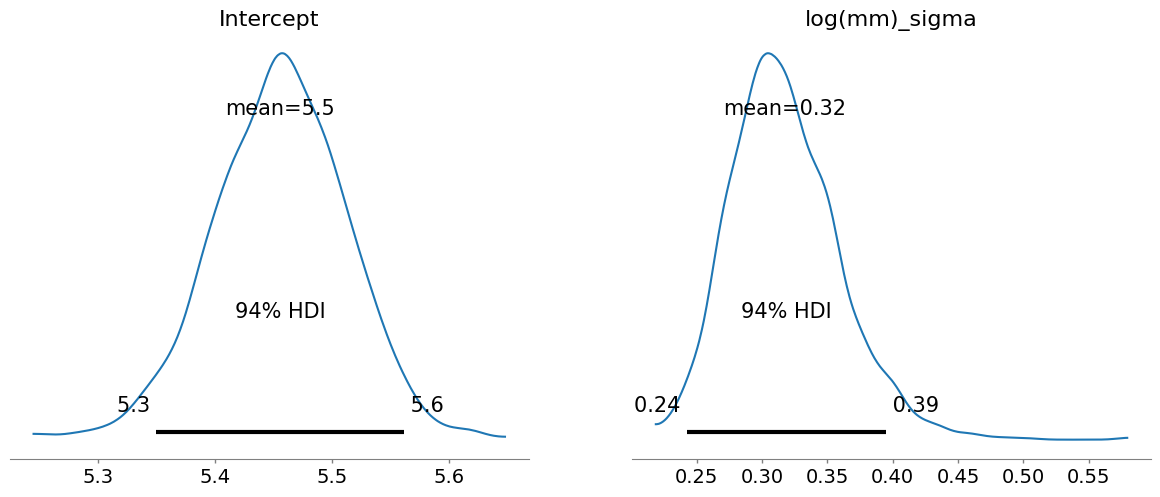

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,5.455,0.057,5.350,5.561,0.001,0.001,1712.0,1242.0,1.0
log(mm)_sigma,0.317,0.042,0.243,0.395,0.001,0.001,1682.0,1506.0,1.0


In [ ]:
# Distribuciones a posteriori
# CODIGO DEL ALUMNO ============================================================

# ==============================================================================

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


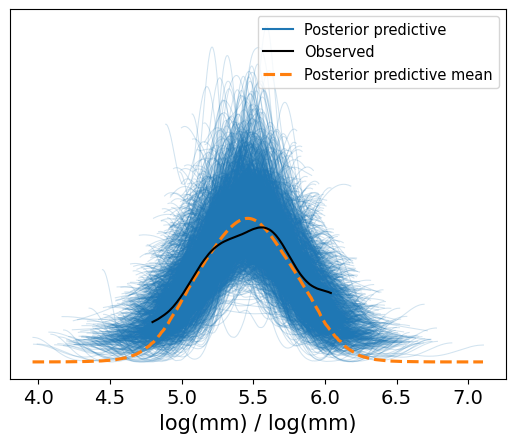

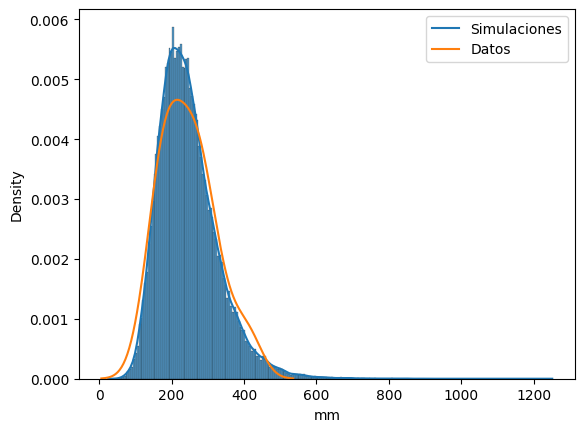

In [ ]:
# Simulaciones predictivas
# CODIGO DEL ALUMNO ============================================================

# ==============================================================================

# Posterior predictiva
# CODIGO DEL ALUMNO ============================================================

# ==============================================================================
plt.show()

# Histograma
# CODIGO DEL ALUMNO ============================================================

# ==============================================================================
sns.kdeplot(data = yearly_max, x='mm',label='Datos')
plt.legend()
plt.show()

¡Este ya tiene más pinta!

#### Modelo de datos Lognormal (bis)

Por razones que vamos a ver más adelante, les dejamos construido el modelo lognormal pero ya no ajustando un modelo normal al logaritmo, sino en forma directa (es un poco más engorroso).

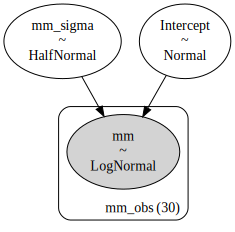

In [ ]:
# Construct likelihood distribution ------------------------------
# This must use a valid PyMC distribution name.
# 'parent' is the name of the variable that represents the mean of the distribution.
likelihood = bmb.Likelihood("LogNormal", params=["mu", "sigma"], parent="mu")

# Set link function ----------------------------------------------
# 1. Pass a name that is known by Bambi
link = {"mu": "identity"}

# Construct the family -------------------------------------------
# Families are defined by a name, a Likelihood and a Link.
family = bmb.Family("lognormal", likelihood, link)

# Choose Priors (necessary for custom families) ------------------
priors = {"Intercept": bmb.Prior("Normal",mu=yearly_max['mm'].mean(),sigma=100),
  "sigma": bmb.Prior("HalfNormal", sigma=10)}

model2_bis = bmb.Model("mm ~ 1", yearly_max, family=family,priors=priors)

# Ver el modelo
model2_bis.build()
model2_bis.graph()

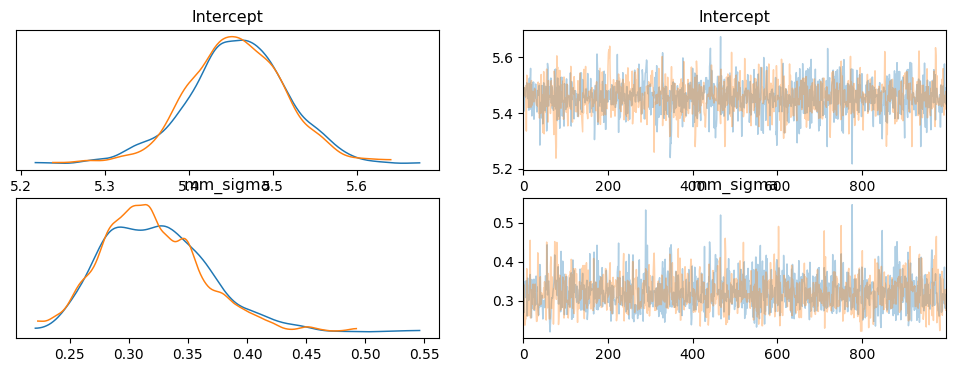

In [ ]:
# Hacer inferencia
results2_bis = model2_bis.fit(idata_kwargs={"log_likelihood": True})

# MCMC diagnostic
az.plot_trace(results2_bis, compact=False);
plt.show()

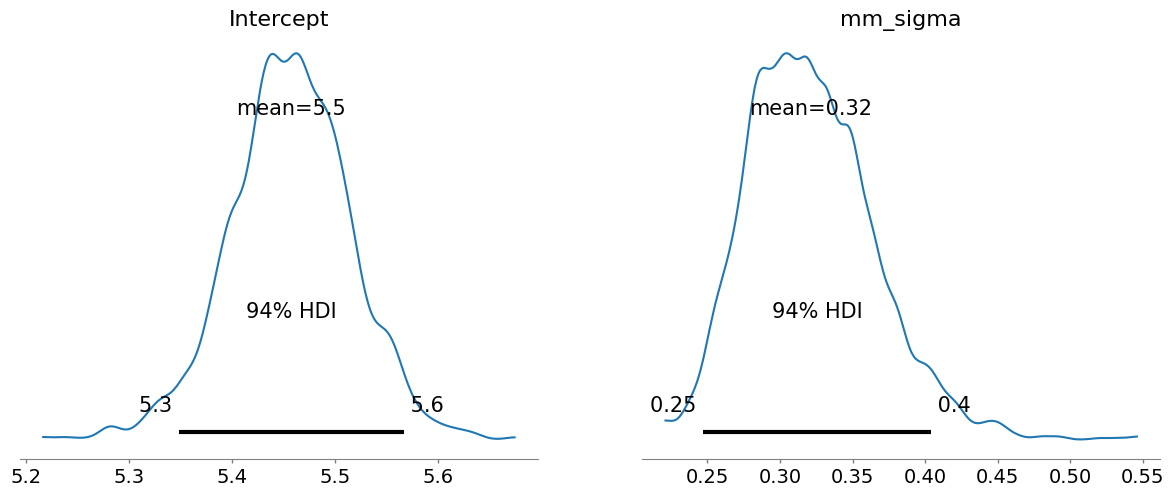

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,5.457,0.059,5.348,5.567,0.001,0.001,1757.0,1271.0,1.0
mm_sigma,0.321,0.044,0.247,0.404,0.001,0.001,1552.0,1243.0,1.0


In [ ]:
# Distribuciones a posteriori
az.plot_posterior(results2_bis)
plt.show()

az.summary(results2_bis)

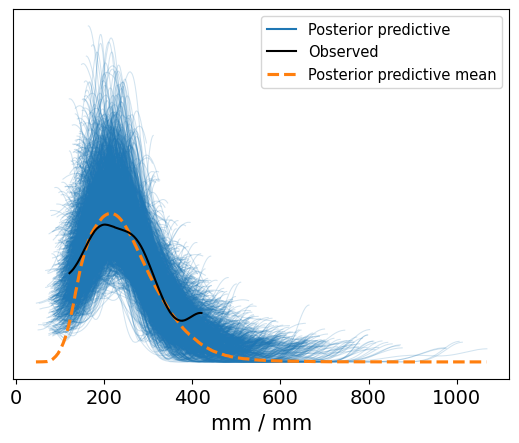

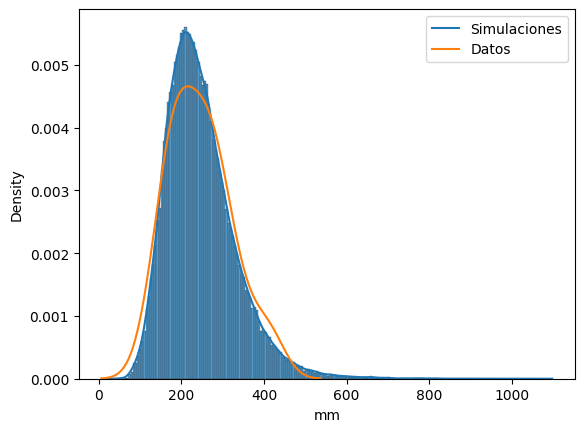

In [ ]:
# Simulaciones predictivas
model2_bis.predict(results2_bis, kind="pps")

az.plot_ppc(results2_bis)
plt.show()

sns.histplot(data=np.ravel(results2_bis.posterior_predictive['mm']),stat='density')
sns.kdeplot(data=np.ravel(results2_bis.posterior_predictive['mm']),label='Simulaciones')
sns.kdeplot(data = yearly_max, x='mm',label='Datos')
plt.legend()
plt.show()

##### Actividad 4

**Actividad**: Grafique en un mismo gráfico las distribuciones posteriores predictivas del los dos modelos Lognormales y verifique que efectivamente arrojaron los mismos resultados.

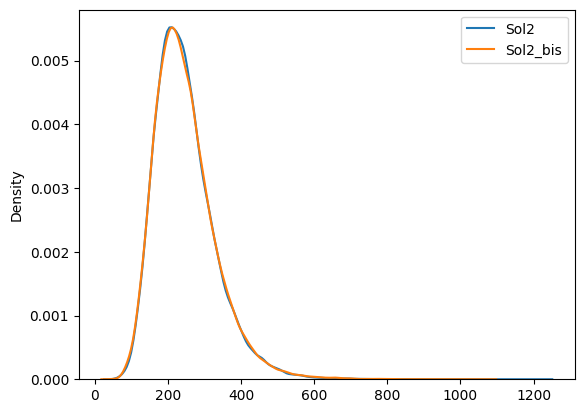

In [ ]:
# CODIGO DEL ALUMNO ============================================================

# ==============================================================================

**Su respuesta**:

#### Modelo de datos: Weibull

##### Actividad 5

**Actividad**: Haga lo mismo pero para una distribución de Weibull

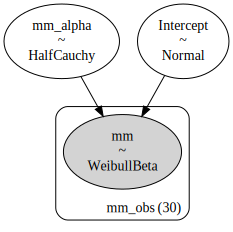

In [ ]:
# CODIGO DEL ALUMNO ============================================================
model3 =
# ==============================================================================

# Ver el modelo
model3.build()
model3.graph()

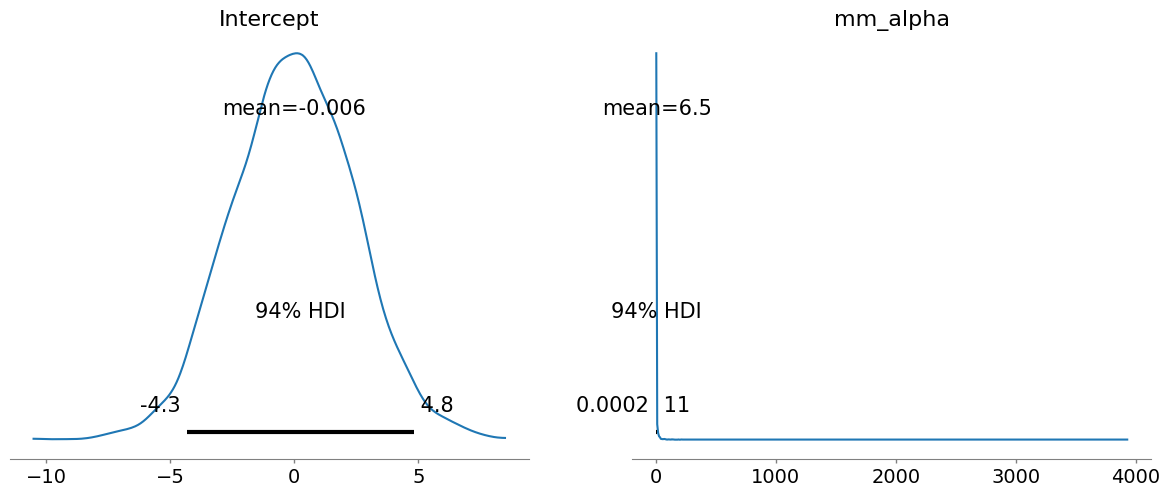

In [ ]:
# Mostrar Distribuciones a Priori
# CODIGO DEL ALUMNO ============================================================

# ==============================================================================

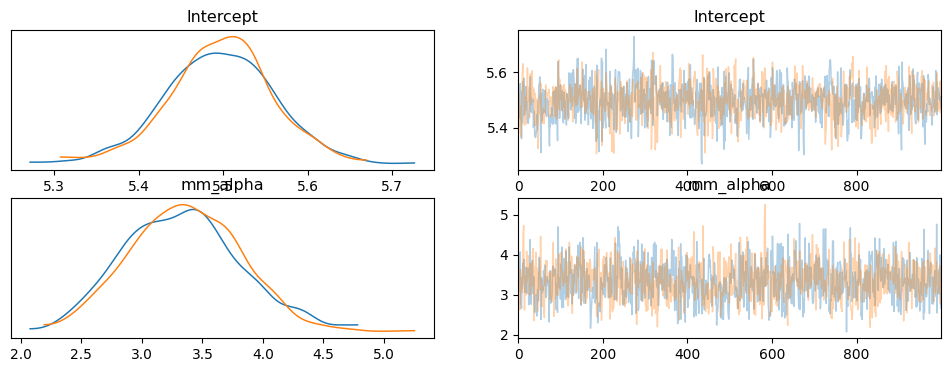

In [ ]:
# Hacer inferencia
# CODIGO DEL ALUMNO ============================================================
results3 =
# ==============================================================================

# MCMC diagnostic
az.plot_trace(results3, compact=False);
plt.show()

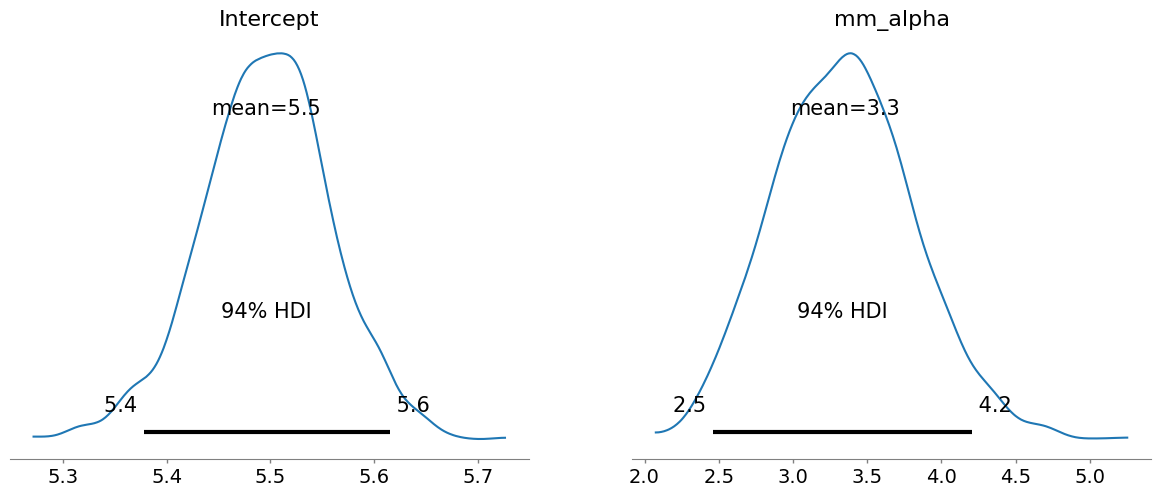

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,5.496,0.062,5.378,5.615,0.002,0.001,962.0,1019.0,1.0
mm_alpha,3.347,0.468,2.460,4.203,0.014,0.010,1051.0,1317.0,1.0


In [ ]:
# Distribuciones a posteriori
# CODIGO DEL ALUMNO ============================================================

# ==============================================================================

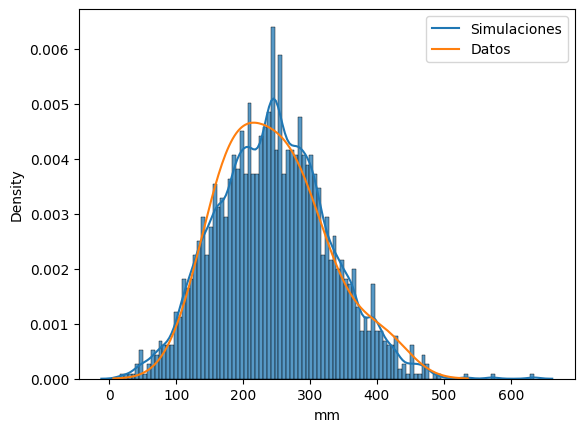

In [ ]:
# Simulaciones predictivas
# CODIGO DEL ALUMNO ============================================================

# ==============================================================================

# Histograma
# CODIGO DEL ALUMNO ============================================================

# ==============================================================================
sns.kdeplot(data = yearly_max, x='mm',label='Datos')
plt.legend()
plt.show()

No parecen parecerse mucho, ¿no? Probemos otro modelo.

#### Modelo de datos: Gumbel

Por último, a continuación se deja la construcción de un modelo de Máximo Tipo I (Gumbel), ya que este no se encuentra fácilmente disponible en la librería Bambi.

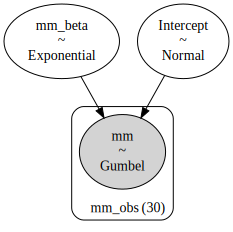

In [ ]:
# Construct likelihood distribution ------------------------------
# This must use a valid PyMC distribution name.
# 'parent' is the name of the variable that represents the mean of the distribution.
likelihood = bmb.Likelihood("Gumbel", params=["mu", "beta"], parent="mu")

# Set link function ----------------------------------------------
# 1. Pass a name that is known by Bambi
link = {"mu": "identity"}

# Construct the family -------------------------------------------
# Families are defined by a name, a Likelihood and a Link.
family = bmb.Family("gumbel", likelihood, link)

# Choose Priors (necessary for custom families) ------------------
priors = {"Intercept": bmb.Prior("Normal",mu=yearly_max['mm'].mean(),sigma=100),
  "beta": bmb.Prior("Exponential", lam=1/10)}

model4 = bmb.Model("mm ~ 1", yearly_max, family=family,priors=priors)

# Ver el modelo
model4.build()
model4.graph()

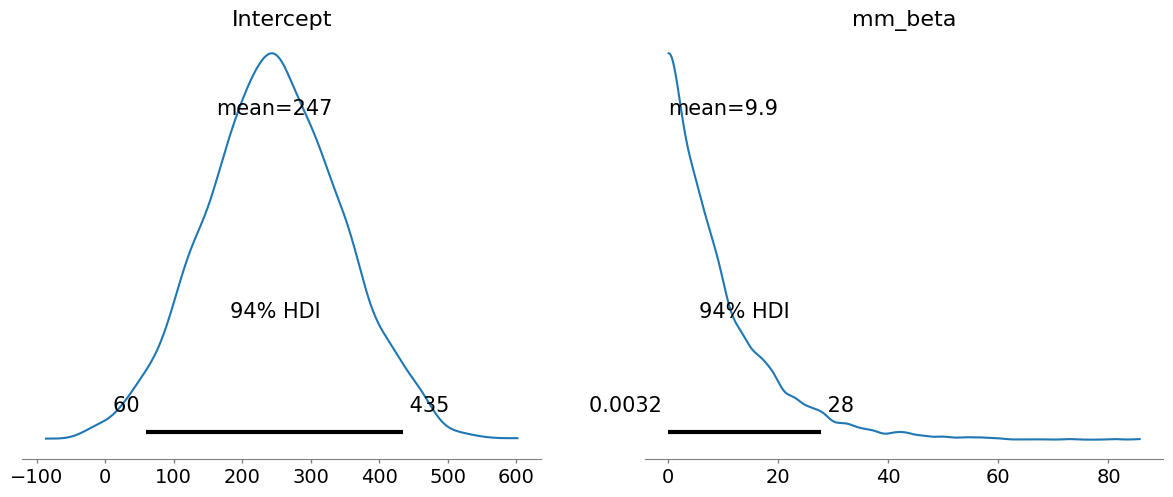

In [ ]:
# Mostrar Distribuciones a Priori
model4.plot_priors()
plt.show()

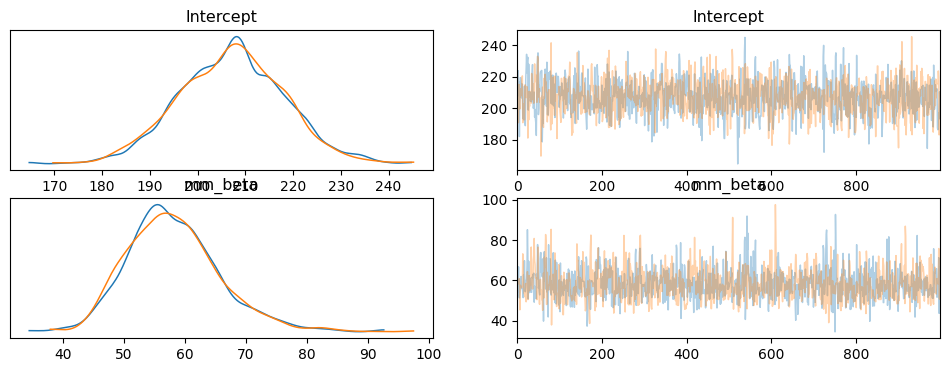

In [ ]:
# Hacer inferencia
results4 = model4.fit(idata_kwargs={"log_likelihood": True})

# MCMC diagnostic
az.plot_trace(results4, compact=False);
plt.show()

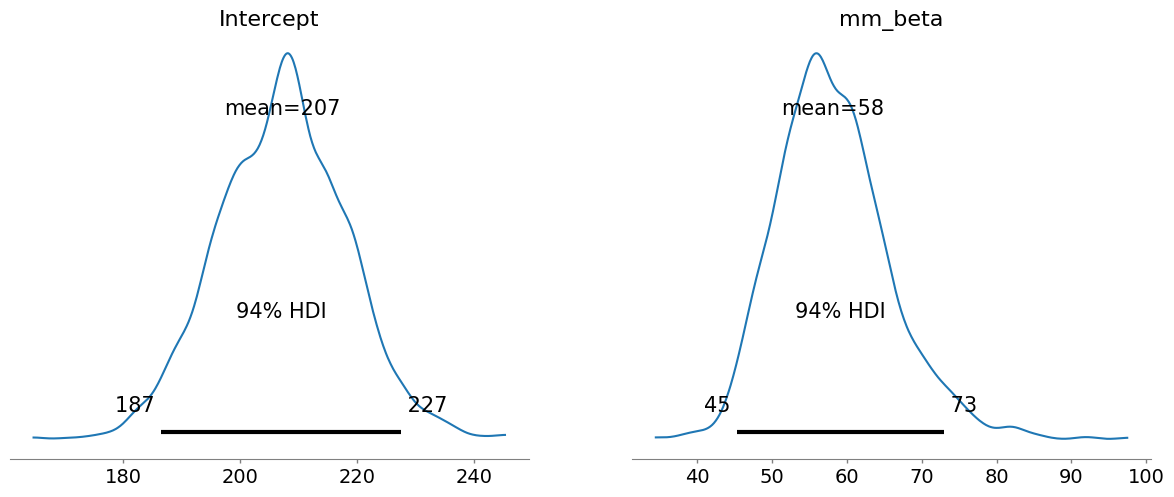

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,207.126,10.978,186.562,227.388,0.293,0.207,1402.0,1370.0,1.0
mm_beta,58.128,7.621,45.261,72.955,0.222,0.161,1249.0,1411.0,1.0


In [ ]:
# Distribuciones a posteriori
az.plot_posterior(results4)
plt.show()

az.summary(results4)

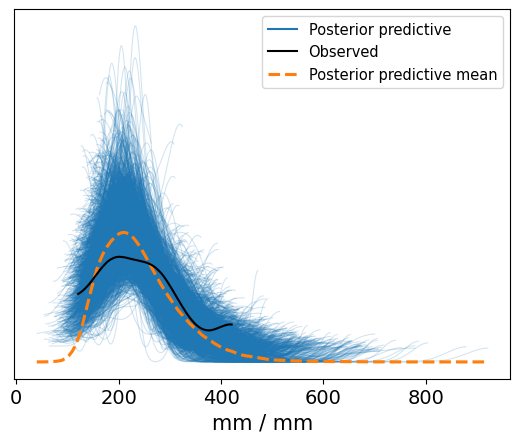

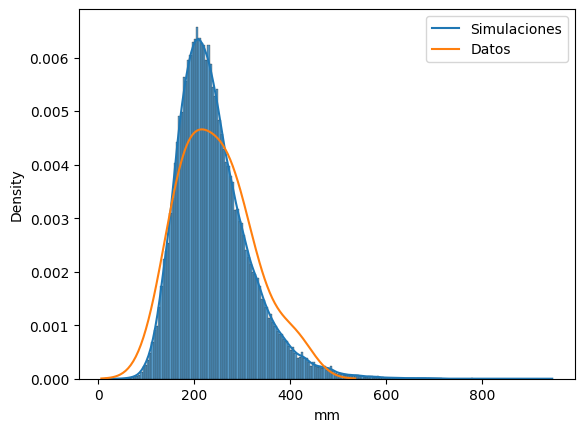

In [ ]:
# Simulaciones predictivas
model4.predict(results4, kind="pps")

az.plot_ppc(results4)
plt.show()

sns.histplot(data=np.ravel(results4.posterior_predictive['mm']),stat='density')
sns.kdeplot(data=np.ravel(results4.posterior_predictive['mm']),label='Simulaciones')
sns.kdeplot(data = yearly_max, x='mm',label='Datos')
plt.legend()
plt.show()

### Validación de Modelos

Recién construimos muchos modelos, pero, ¿cuál se ajusta mejor a los datos? Algo de eso lo estuvimos viendo a partir de los histogramas. Una buena forma de hacer eso mismo es a través de QQ-plots.

##### Actividad 6

**Actividad**: Construya los QQ-plots para los 4 modelos candidatos.

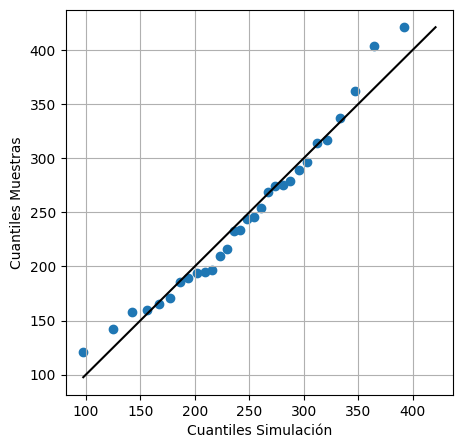

In [ ]:
# Normal
# CODIGO DEL ALUMNO ============================================================

# ==============================================================================

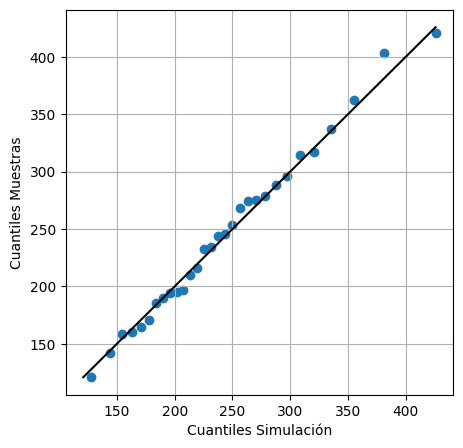

In [ ]:
# LogNormal
# CODIGO DEL ALUMNO ============================================================

# ==============================================================================

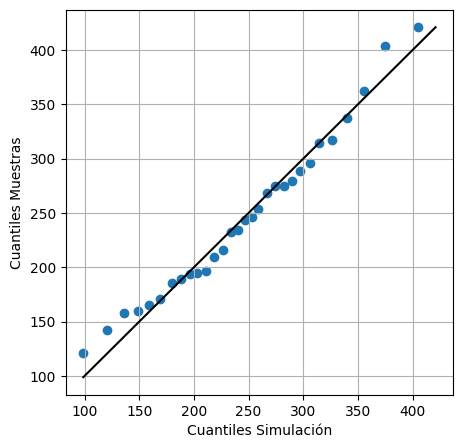

In [ ]:
# Weibull
# CODIGO DEL ALUMNO ============================================================

# ==============================================================================

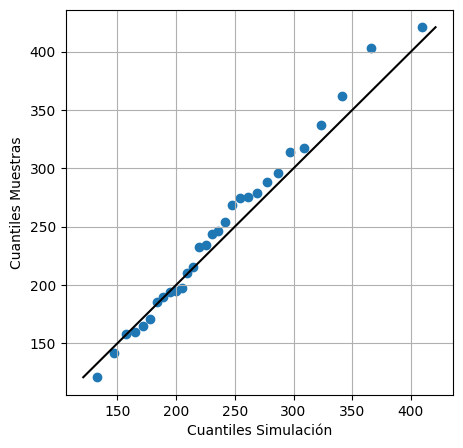

In [ ]:
# Gumbel
# CODIGO DEL ALUMNO ============================================================

# ==============================================================================

##### Actividad 7

**Actividad**: Haga un análisis de validación cruzada (Leave-One-Out-CrossValidation) de los 4 modelos

NOTA: La razón por la que generamos el modelo lognormal "bis" era para que sea comparable con los otros en esta actividad. El modelo para el $\log(y)$ al estar escrito para "otra variable" no es igual.



In [ ]:
# Comparamos los modelos polinómicos mediane PSIS-LOOCV
# CODIGO DEL ALUMNO ============================================================

# ==============================================================================

az_comp_loo

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
LogNormal,0,344.853549,1.599980,0.000000,9.466006e-01,7.119605,0.000000,False,deviance
Gumbel,1,345.376341,1.828873,0.522792,5.339944e-02,8.535310,1.562964,False,deviance
Normal,2,347.417497,1.743110,2.563948,5.073338e-16,7.517768,2.654976,False,deviance
Weibull,3,347.775960,1.705061,2.922411,0.000000e+00,6.712917,2.605519,False,deviance


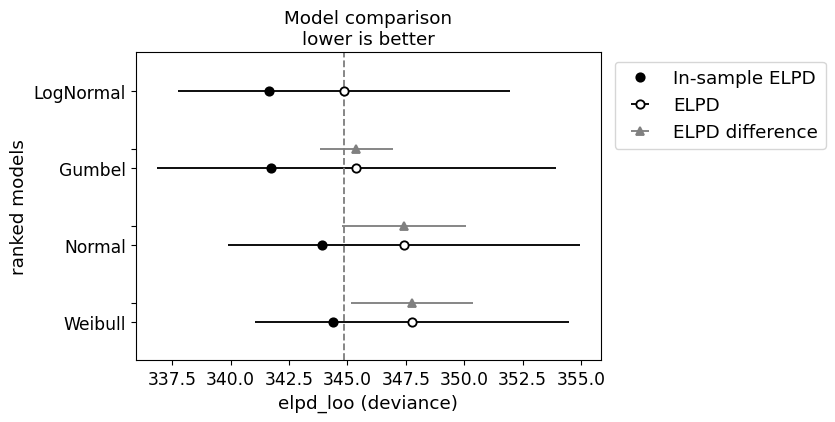

In [ ]:
# CODIGO DEL ALUMNO ============================================================

# ==============================================================================

##### Actividad 8

**Actividad**:

1. En base a los QQ-plots: ¿Qué modelo se parece más a los datos? ¿Por qué? ¿Qué implica la forma parabólica en un QQ-plot?
2. Teoría de extremos: ¿Los modelos elegidos son acordes al tipo de problema?
3. En base a lo anterior y los datos de LOOV, con qué modelo se quedaría?

**Su respuesta**:

##### Actividad 9

**Actividad**: Guarde en un vector `y_post` las simulaciones del modelo seleccionado.

In [ ]:
# CODIGO DEL ALUMNO ============================================================

# ==============================================================================

###Periodo de Retorno

Habiendo elegido el modelo, lo que falta ahora es definir la lluvia mensual asociada a un período de retorno de 100 años (es decir, la lluvia mensual que ocurre en promedio una vez cada 100 años). El período de retorno $T(x)$ es, entonces, el tiempo promedio $T$ entre eventos que superan determinado valor de la variable $x$:

$$T(x) = \frac{1}{1-p(X\leq x)}$$

El proceso entonces es
1. Hallar la probabilidad de excedencia asociada a un período de retorno de 100 años `p_100`.
2. Hallar la lluvia con esa probabilidad de excedencia en base a los datos simulados.

##### Actividad 10

**Actividad**: Obtenga la lluvia mensual con un período de retorno de 100 años en CABA. Indique la probabilidad de excedencia asociada en un determinado año.

In [ ]:
T = 100

# CODIGO DEL ALUMNO ============================================================
p_100 =

mm_100 =
# ==============================================================================

print('La probabilidad de excedencia es',p_100)
print('La Lluvia Mensual con período de retorno de 100 años es de',mm_100,'mm')

La probabilidad de excedencia es 0.01
La Lluvia Mensual con período de retorno de 100 años es de 499.79024536374766 mm


## Avance del TP Integrador

Al momento de la entrega del Trabajo Práctico 2, el grupo ya debiera tener definido el dataset a utilizar en el Trabajo Práctico Integrador.

En esta etapa se busca que el grupo haya hecho una limpieza y análisis de los datos de forma tal de:
* Identificar potenciales relaciones entre variables
* Identificar potenciales modelos de generación de datos
* Definición de las preguntas que se buscan contestar con los datos.

Este paso es muy importante ya que hará al grueso del avance intermedio, y tener al docente al tanto les permitirá acotar el trabajo y marcar la hoja de ruta para las semanas siguientes.

**Actividad**: Presentar a los docentes los avances con el dataset seleccionado, identificando el tipo de problema a resolver y estrategias a implementar para responderlas. Es posible que las herramientas no las tengan al momento de la entrega del TP.

# Impresión del Archivo final (.html)

Para la entrega del TP2, siga los siguientes pasos:
1. Vuelva a correr el Colab desde 0 para asegurar que no haya ningún bug y todo funcione tal como se desea (`Restart session and run all`)
2. Descarge el arcihvo .ipynb en su computadora
3. Utilice el arhivo `ImpresionHTML.ipynb` del campus. Le pedirá subir el arhivo que quiere convertir a html y lo hará por ustedes.

Revisé que está todo como les gusta y ¡ya está listo!